Data Analytics III
1. Implement Simple Naïve Bayes classification algorithm using
Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN,
Accuracy, Error rate, Precision,
Recall on the given dataset

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Step 1: Load the dataset
df = pd.read_csv('Iris.csv') 

In [7]:
# Step 2: Explore the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())

First 5 rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), o

In [8]:
# Step 3: Preprocess the data
# Encoding the target variable (Species) to numeric labels
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [9]:
# Step 4: Define features and target variable
X = df.drop(columns=['Species'])  # Features (all columns except 'Species')
y = df['Species']  # Target variable (Species)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Step 5: Train Naïve Bayes model
model = GaussianNB()
model.fit(X_train_scaled, y_train)

GaussianNB()

In [12]:
# Step 6: Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [13]:
# Step 7: Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [19]:
# Step 8: Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='macro')  # 'macro' for multi-class
f1 = f1_score(y_test, y_pred, average='macro')  # 'macro' for multi-class

In [20]:
# Step 9: Output metrics
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 1.00
Error Rate: 0.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


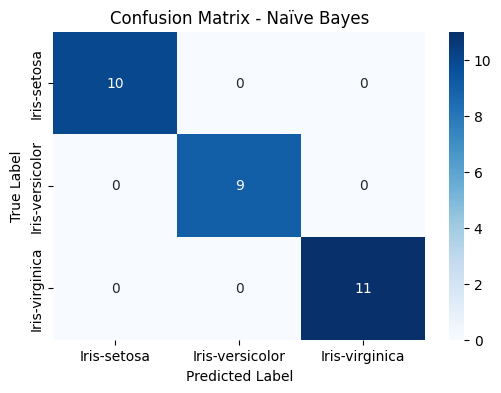

In [16]:
# Step 10: Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()

In [17]:
# Step 11: Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



### **1. What is Naïve Bayes?**
Naïve Bayes is a classification algorithm that uses **probabilities** to predict the class of an object based on its features. It’s called "naïve" because it assumes that all features (like sepal length, petal width, etc.) are independent from each other, which is often not true in real life, but it still works well for many problems.

### **2. How Does It Work?**
Imagine you are trying to predict the type of flower (Iris-setosa, Iris-versicolor, or Iris-virginica) based on its features (like petal length, sepal width). Here’s what the Naïve Bayes algorithm does:
- It looks at how likely each feature is for each type of flower (species).
- It calculates the **probability** of each species based on the features.
- It picks the species that has the highest probability for the given features.

### **3. Steps for Applying Naïve Bayes on the Iris Dataset**

**Step 1: Data**
The Iris dataset contains 150 flowers with 4 features (sepal length, sepal width, petal length, petal width) and 3 species (Setosa, Versicolor, and Virginica). The goal is to predict the species based on the features.

**Step 2: Prepare the Data**
- The species names need to be converted to numbers (like 0, 1, 2) so the model can understand them. This is done using **Label Encoding**.

**Step 3: Split the Data**
- Split the data into two sets:
  - **Training set**: Used to train the model.
  - **Test set**: Used to test the model’s performance.

**Step 4: Train the Model**
- The Naïve Bayes model is trained using the training data. It learns the probability of each feature for each species.

**Step 5: Make Predictions**
- Once the model is trained, you use it to predict the species of flowers in the test set.

**Step 6: Evaluate the Model**
- We evaluate how well the model performed using metrics like:
  - **Confusion Matrix**: Shows how many flowers were predicted correctly or incorrectly for each species.
  - **Accuracy**: The percentage of correct predictions.
  - **Precision**: How many of the predicted flowers actually belong to that species.
  - **Recall**: How many flowers of a particular species were correctly identified.

### **4. Example of Metrics**
Let’s say the model predicted the species of 30 test flowers and here’s what the confusion matrix looks like:

|               | Predicted Setosa | Predicted Versicolor | Predicted Virginica |
|---------------|------------------|----------------------|---------------------|
| **True Setosa**      | 10               | 0                    | 0                   |
| **True Versicolor**  | 0                | 9                    | 0                   |
| **True Virginica**   | 0                | 0                    | 11                  |

- **Accuracy**: Percentage of correct predictions. If the model got 30 out of 30 correct, the accuracy is 100%.
- **Precision**: If the model predicted a flower to be Setosa, how often was it right? If the model predicted Setosa 10 times and was correct all 10 times, the precision for Setosa is 100%.
- **Recall**: How well did the model find all the Setosa flowers? If there were 10 Setosa flowers and the model predicted all 10 correctly, the recall is 100%.

### **5. Why Naïve Bayes Works Well for Iris Dataset**
- The features in the Iris dataset are fairly distinct for each species (the flowers are different in shape and size), so the model can easily tell them apart.
- Even though the "naive" assumption of independence between features is not perfectly true, Naïve Bayes works surprisingly well on this dataset.
